In [19]:
%matplotlib widget

In [20]:
from tqdm import tqdm
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


from copy import deepcopy

In [21]:

def update(i):
    """
    Animation update function
    """
    for _ in range(skip_frame):
        c = next(sol)

    img.set_data(c)
    title.set_text(f"Time = {i*skip_frame*dt:.6f}")
    return img, title,


def integrate(c):
    """
    Time-stepping/integration scheme
    """
    # Explicit Euler
    laplacian = lambda c: (np.roll(c, 1, axis=0) + np.roll(c, -1, axis=0) + np.roll(c, 1, axis=1) + np.roll(c, -1, axis=1) - 4*c) / h**2
    while True:
        c += dt*laplacian(c**3 - c - a**2*laplacian(c))
        yield c



In [22]:

# Problem parameters
a = 1e-2
n = 64
#-- CH
# dt = 1e-5   # good for CH
# n_step = 12000*4    # good for CH
# dt = 1e-3   # good for CH
# n_step = 12000*6    # good for CH
#-- TDGLE
dt = 1e-2   # good for TDGLE
n_step = 12000*10   # good for TDGLE
skip_frame = 10


In [23]:
np.random.seed(1905)
# Initialise vectors
x, h = np.linspace(0, 1, n, endpoint=False, retstep=True)
# c = 2*np.random.rand(n, n) - 1    # random float between -1 and 1
c = 2*np.round(np.random.rand(n, n)) - 1  # -1 or 1 in random
# sol = integrate(c)


# #--- two circles
# l = 200
# R = 30
# dr = 2
# k = -1
# D = 1e-2
# u1 = -1
# u2 = 0
# u3 = 1

# u_in = u3
# u_out = u1
# xx = np.arange(-l/2, l/2, dr)
# X, Y = np.meshgrid(xx,xx)
# # # create initial condition
# R1 = 30
# R2 = 15
# # Z1 = ((X-20)**2 + (Y-20)**2)
# # Z2 = ((X+40)**2 + (Y+40)**2)
# Z1 = ((X)**2 + (Y)**2)
# Z2 = ((X+30)**2 + (Y+30)**2)
# Z_logic = (Z1 < R1**2) | (Z2 < R2**2)
# Z = np.empty(Z_logic.shape).astype(float)
# Z[Z_logic] = u_in
# Z[~Z_logic] = u_out
# from scipy import ndimage
# c = ndimage.gaussian_filter(Z, sigma=0.5)

In [24]:
# from pyUtils import MyGeneral
# locals().update(MyGeneral.cachePickleReadFrom())
# c = Z
# n = Z.shape[0]
# x, h = np.linspace(0, 1, n, endpoint=False, retstep=True)

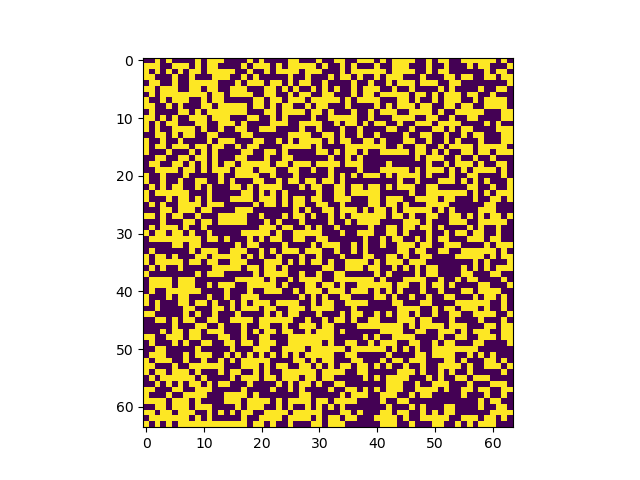

In [25]:
plt.figure()
plt.imshow(c, interpolation='none')

In [26]:
# Explicit Euler
laplacian = lambda c: (np.roll(c, 1, axis=0) + np.roll(c, -1, axis=0) + np.roll(c, 1, axis=1) + np.roll(c, -1, axis=1) - 4*c) / h**2
sol = [deepcopy(c)]


In [27]:
for i in tqdm(range(n_step)):
    # c += dt*laplacian(c**3 - c - a**2*laplacian(c)) # CH equation
    # c += dt*(c**3 - c + a**2*laplacian(c))        # TDGLE
    c += dt*(-(c+1)*c*(c-1) + a**2*laplacian(c))        # TDGLE
    sol.append(deepcopy(c))


100%|██████████| 120000/120000 [00:48<00:00, 2452.87it/s]


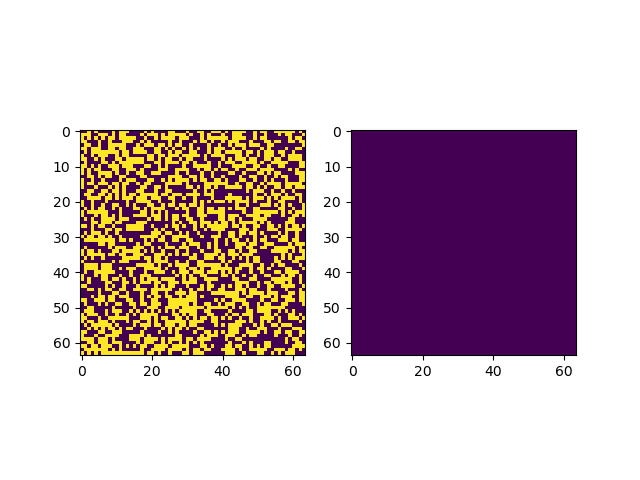

In [28]:

# Initialize animation
fig, ax = plt.subplots(1,2)
img = ax[0].imshow(sol[0], vmin=-1, vmax=1, interpolation='none')
img = ax[1].imshow(sol[-1], vmin=-1, vmax=1, interpolation='none')
# fig.colorbar(img, ax=ax)
# ax.axis("off")
# title = ax.text(.5, .1, "", bbox={'facecolor': 'w', 'alpha': 0.7, 'pad': 5}, transform=ax.transAxes, ha="center")


In [29]:
len(sol)

120001

100%|██████████| 1201/1201 [00:01<00:00, 624.04it/s]


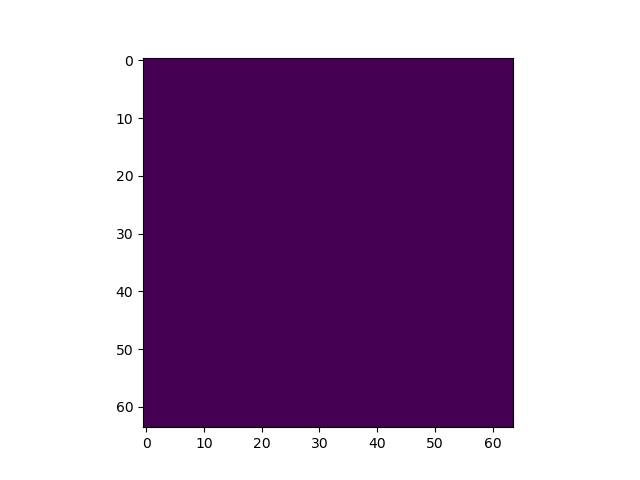

In [30]:
import matplotlib.animation as animation
fig, ax = plt.subplots()
# ims = [ax.imshow(s, vmin=-1, vmax=1, interpolation='none', animated=True) for s in sol]
ims = []
# for i in tqdm(range(len(sol))):
for i in tqdm(range(0, len(sol), 100)):
    im = ax.imshow(sol[i], vmin=-1, vmax=1, interpolation='none', animated=True)
    ims.append([im])



In [ ]:
import datetime
T = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
name = 'rand_start_'+T
# name = 'touching_circles_'+T

from pathlib import Path
path_str = f'/mnt/g/My Drive/STUDY/CondMatt2/final project/outputs/{name}'
# saving_folder = Path()


In [ ]:
saving_dict = {
    'a' : a,
    'n' : n,
    'dt' : dt,
    'n_step' : n_step,
    'skip_frame' : skip_frame,
    'initial'   : c,
    'sol'   : sol,
}

In [ ]:
import os
if ~os.path.exists(path_str):
    os.makedirs(path_str)

In [ ]:
import pickle
with open(path_str+'/filename.pickle', 'wb') as handle:
    pickle.dump(saving_dict, handle)

In [ ]:

# ani = animation.ArtistAnimation(fig, ims, interval=1000, blit=True, repeat_delay=1000)
# ani = animation.ArtistAnimation(fig, ims, interval=1, blit=True)
ani = animation.ArtistAnimation(fig, ims, interval=1, repeat=False, blit=False)

# FFwriter=animation.FFMpegWriter(fps=30, extra_args=['-vcodec', 'libx264'])
# ani.save('plswork.mp4', writer=FFwriter)

writergif = animation.PillowWriter(fps=30)
ani.save(path_str+'/vid.gif',writer=writergif)

# To save the animation, use e.g.

# ani.save("movie.avi")

# writer = animation.FFMpegWriter(
#     fps=15, metadata=dict(artist='Me'), bitrate=1800)
# ani.save("movie.mp4", writer=writer)
